# Barcode Preprocessing & Detection

### Acknowledgement: Code was referred from <a href='https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/'>here </a> and experimented for optimal result. Credits to pyimagesearch.com.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ipcv import cvlib
from importlib import reload
from scipy import stats as st

reload(cvlib)

<module 'ipcv.cvlib' from '/Users/everhett/Projects/python-ws/qr-scanner/ipcv/cvlib.py'>

In [2]:
# A function to display side-by-side visual for comparisons and swaps previous and current data for continues processing.
def display_and_swap(data, curr_img, curr_label, display=True):
    # Display the previous and current side-by-side for visual comparison.
    if display:
        plt.figure(figsize=(14, 12))
        plt.subplot(1, 2, 1)
        plt.imshow(data['prev'], cmap='gray')
        plt.title(data['prev_label'])

        plt.subplot(1, 2, 2)
        plt.imshow(curr_img, cmap='gray')
        plt.title(curr_label)

    # Swap data for subsequent execution.
    data['prev'] = curr_img
    data['prev_label'] = curr_label

    data['curr'] = None
    data['curr_label'] = None

    return data

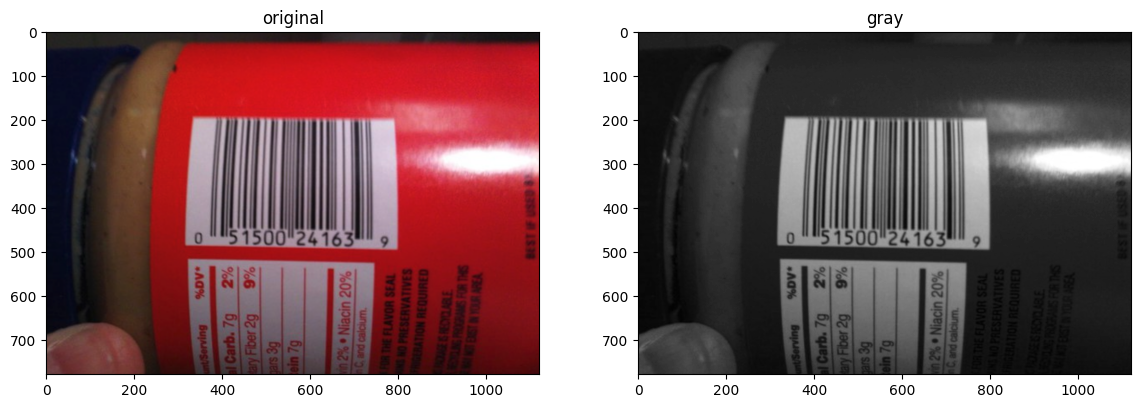

In [3]:
# Load the image as RGB.
image = cvlib.load_image('../resources/barcode/barcode10.png')
# image = cvlib.load_image('resources/barcode/barcode330.JPG')
# plt.imshow(image)

# Convert the image into gray for processing.
label = 'gray'
curr = cvlib.convert_rgb2gray(image)

# Manually set the data once. The swap_and_display() will take care of this data for subsequent operations.
dat = {}
dat = {'prev': image, 'prev_label': 'original', 'curr': curr, 'curr_label': label}

# The current data is replaced to previous for next operation.
dat = display_and_swap(dat, curr, label)

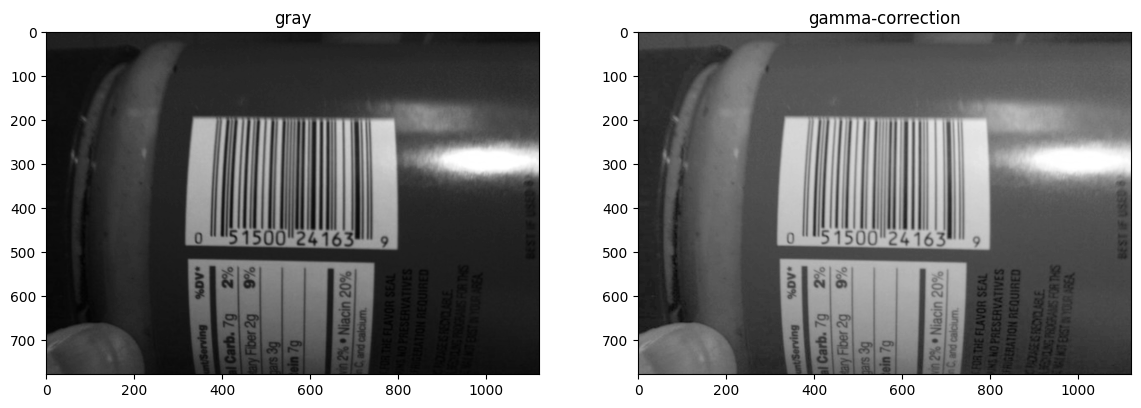

In [4]:
# Correct image's contrast before removing noises.
label = 'gamma-correction'
gamma = 0.5

curr = cvlib.adjust_gamma(dat['prev'], gamma)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

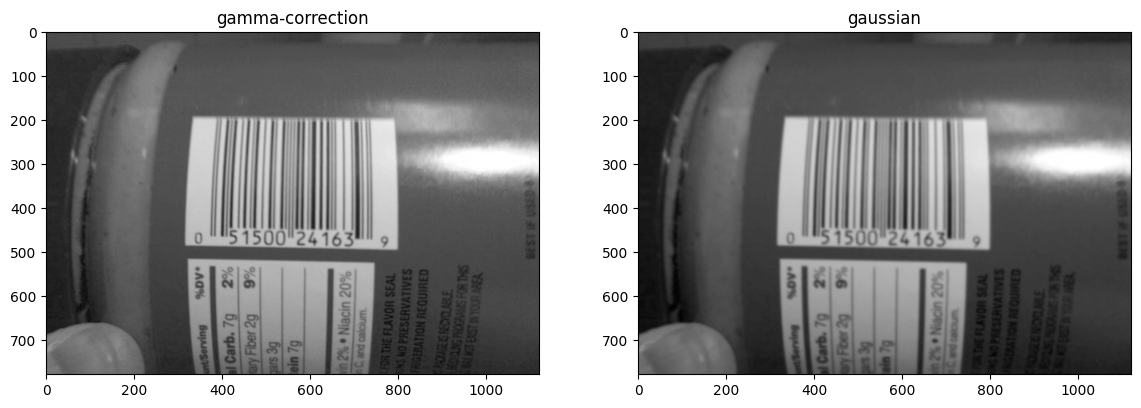

In [5]:
# Gaussian blur to removes noise before processing.
label = 'gaussian'
ksize = (15, 15)
sigma = 2
curr = cvlib.gaussian_blur(dat['prev'], ksize, sigma)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

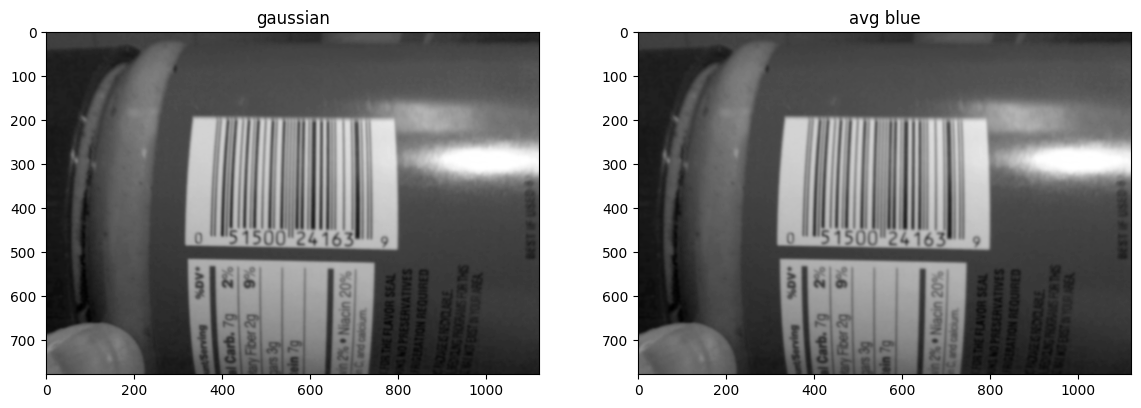

In [6]:
label = 'avg blue'
kernel = [3, 3]
curr = cvlib.average_blur(dat['prev'], kernel)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)


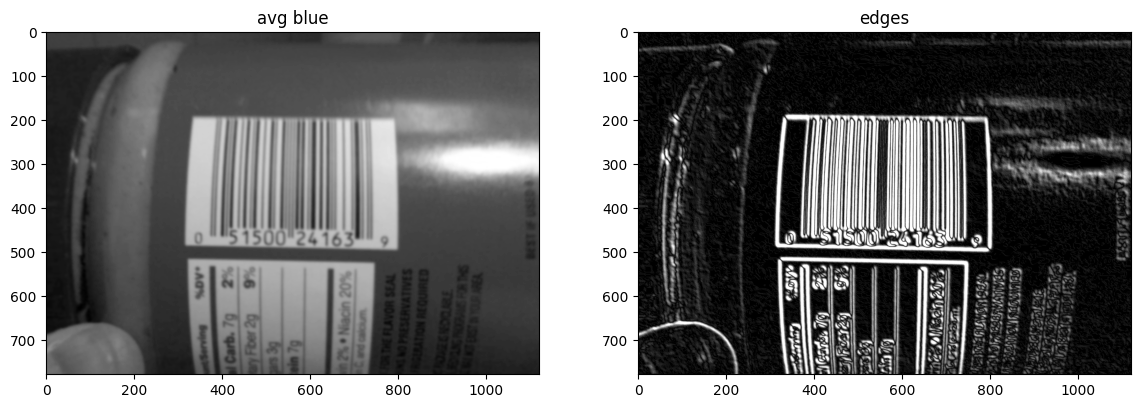

In [7]:
# Detect edges for processing.
label = 'edges'
curr = cvlib.detect_gradient(dat['prev'])

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

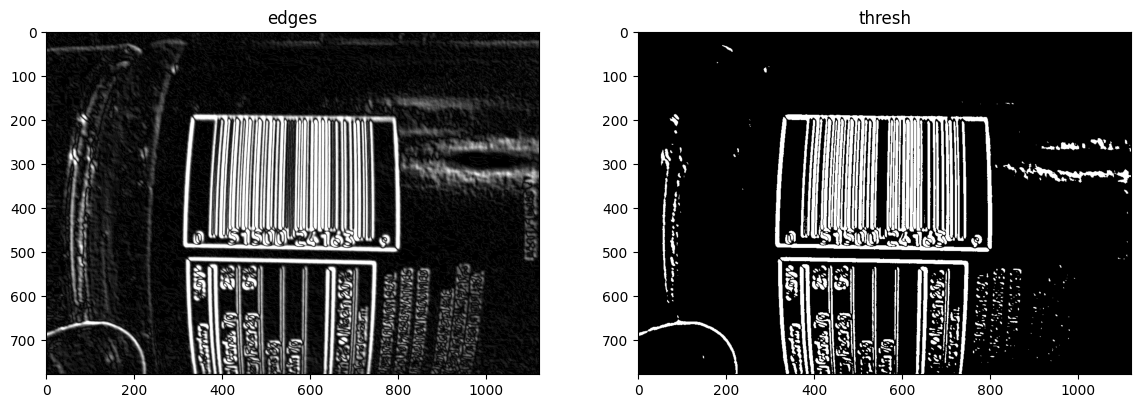

In [8]:
label = 'thresh'
thresh = 127
curr = cvlib.binarize(dat['prev'], thresh)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)

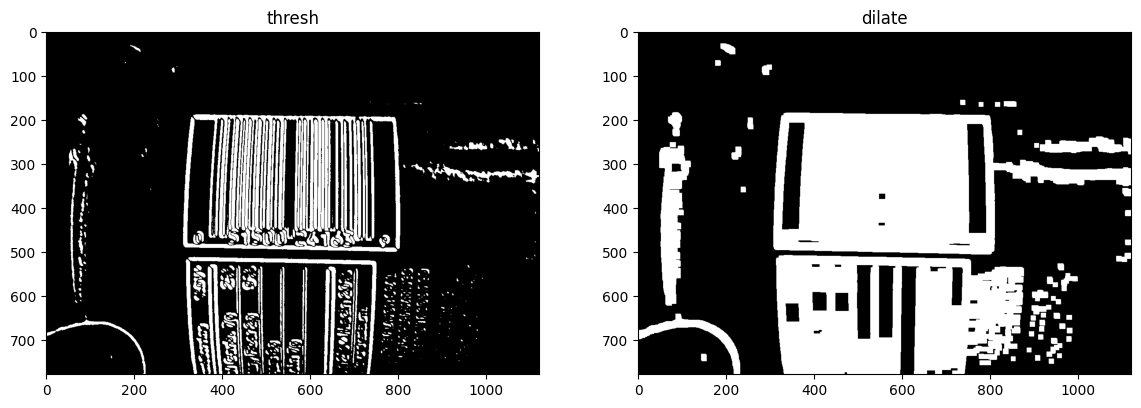

In [9]:
label = 'dilate'
curr = cvlib.dilate(dat['prev'], [24, 2], 5)

# Display and swap for data for next operation.
dat = display_and_swap(dat, curr, label)


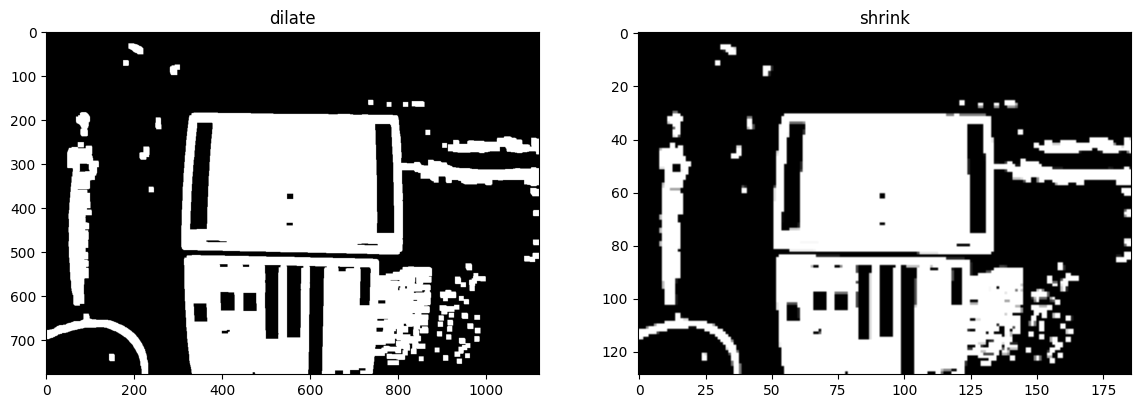

In [10]:
label = 'shrink'
x = dat['prev']
new_width = int(x.shape[1] / 6)
new_height = int(x.shape[0] / 6)

curr = cvlib.resize_image(dat['prev'], new_width, new_height)
dat = display_and_swap(dat, curr, label)

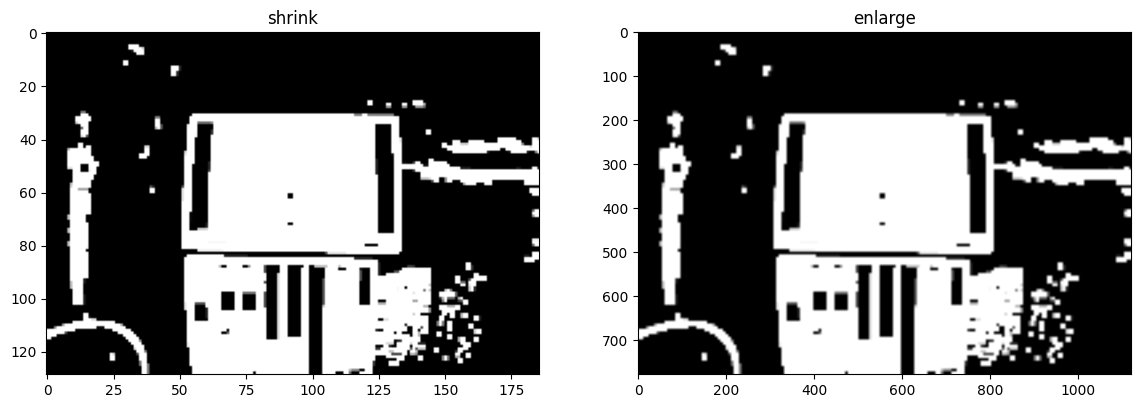

In [11]:
label = 'enlarge'

curr = cvlib.resize_image(dat['prev'], x.shape[1], x.shape[0])
dat = display_and_swap(dat, curr, label)

In [12]:
# label = 'contour'
process_img, cropped = cvlib.get_prominent_contour(image, dat['prev'])

Text(0.5, 1.0, 'Cropped')

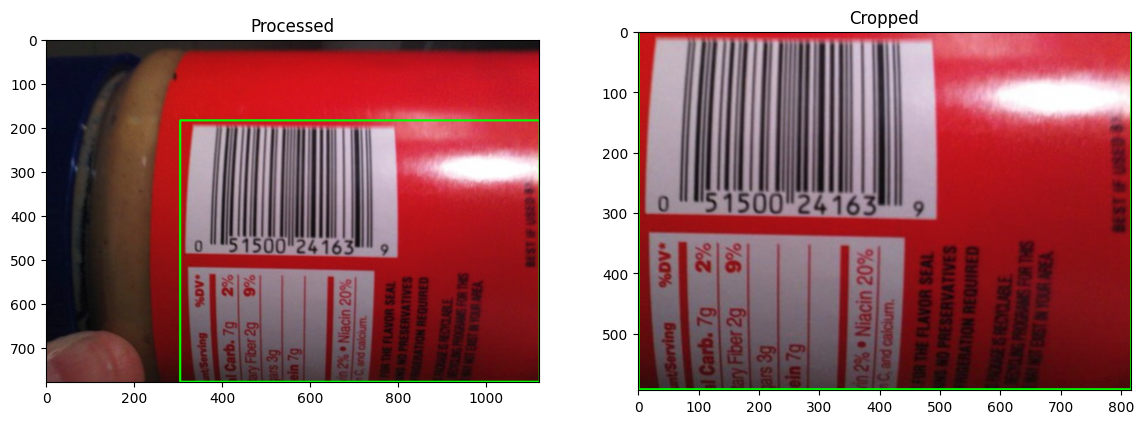

In [13]:
# plt.imshow(image)
plt.figure(figsize=(14, 12))
plt.subplot(1, 2, 1)
plt.imshow(process_img, cmap='gray')
plt.title('Processed')

plt.subplot(1, 2, 2)
plt.imshow(cropped, cmap='gray')
plt.title('Cropped')